In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        self.epoch = []
        self.train_loss = []
        self.weights = None
    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        self.weights=np.random.randn(X.shape[1]+1,1)
        self.weights=self.weights*100
        self.weights=self.weights.reshape(X.shape[1]+1,1)
        
        for epoch in range(epochs):
            for batch in range(len(X)//batch_size):
                predict=self.predict(X)-y
                for i in range(X.shape[1]):
                    d_weights=2*np.mean(predict*X[:,i].reshape(X.shape[0],1))
                    self.weights[i] = self.weights[i]-lr*d_weights
                d_intercept=2*np.mean(predict)
                self.weights[-1]= self.weights[-1]-lr*d_intercept         
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X, y))
        
    def get_loss(self, X, y):
        y_hat=self.predict(X)
        return np.mean((y-y_hat)**2)

    def predict(self, X):
        return X.dot(self.weights[:-1])+self.weights[-1]
                 
    def evaluate(self, X, y):
        y_hat=self.predict(X)
        return np.mean((y-y_hat)**2)
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.title('Training loss')
        plt.xlabel('Epochs')
        plt.ylabel('MSE Loss')
        plt.plot(range(len(self.epoch)), self.train_loss, 'b-')
        plt.legend(['Train MSE loss'],loc='upper right')
        plt.show()

Load data & data pre-processing

In [3]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [4]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [7]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################
# You may try different label encoding for training your own model
df_train.loc[df_train.sex=='female','sex']=0
df_train.loc[df_train.sex=='male','sex']=1
df_train.loc[df_train.smoker=='no','smoker']=0
df_train.loc[df_train.smoker=='yes','smoker']=1
df_train.loc[df_train.region=='northeast','region']=0
df_train.loc[df_train.region=='northwest','region']=1
df_train.loc[df_train.region=='southeast','region']=2
df_train.loc[df_train.region=='southwest','region']=3

df_val.loc[df_val.sex=='female','sex']=0
df_val.loc[df_val.sex=='male','sex']=1
df_val.loc[df_val.smoker=='no','smoker']=0
df_val.loc[df_val.smoker=='yes','smoker']=1
df_val.loc[df_val.region=='northeast','region']=0
df_val.loc[df_val.region=='northwest','region']=1
df_val.loc[df_val.region=='southeast','region']=2
df_val.loc[df_val.region=='southwest','region']=3

df_test.loc[df_test.sex=='female','sex']=0
df_test.loc[df_test.sex=='male','sex']=1
df_test.loc[df_test.smoker=='no','smoker']=0
df_test.loc[df_test.smoker=='yes','smoker']=1
df_test.loc[df_test.region=='northeast','region']=0
df_test.loc[df_test.region=='northwest','region']=1
df_test.loc[df_test.region=='southeast','region']=2
df_test.loc[df_test.region=='southwest','region']=3

Single feature (using bmi)

In [8]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)

y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [9]:
# TODO
# You may convert data to NumPy here
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_val=x_val.to_numpy()
y_val=y_val.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.reshape(y_train.shape[0],1)
y_val=y_val.reshape(y_val.shape[0],1)

In [10]:
batch_size = x_train.shape[0]
# TODO
# Tune the parameters
# Refer to slide page 9
lr = 0.001
epochs = 110000
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [11]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [1382.08701567]
Weights:  [[380.14868151]]


In [12]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.49082112


In [13]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920222.16464227


In [14]:
test_pred = linear_reg.predict(x_test)

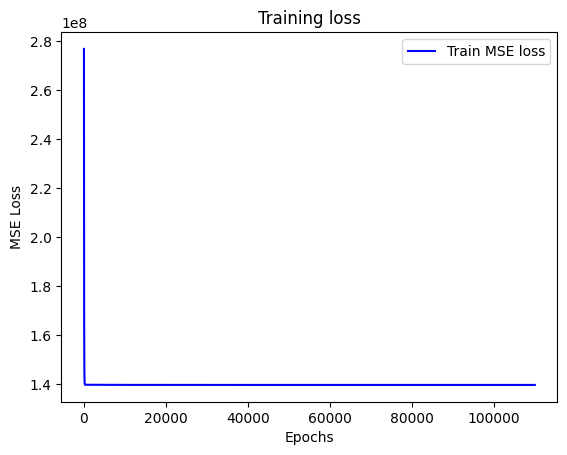

In [15]:
linear_reg.plot_curve()

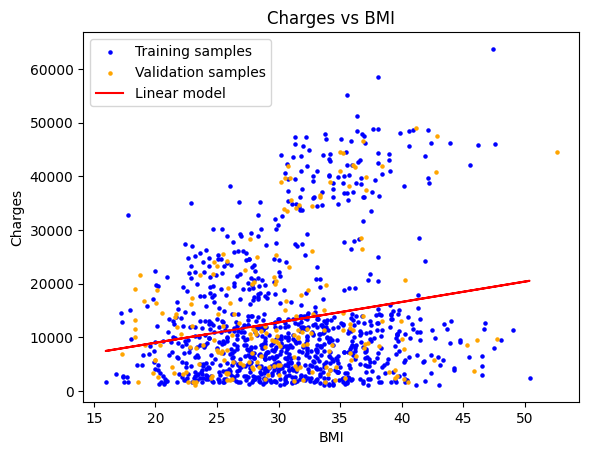

In [16]:
# Use matplotlib to plot the predicted line with the training and validation samples
# TODO
plt.title('Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.scatter(x_train,y_train,s=5,c="blue")
plt.scatter(x_val,y_val,s=5,c="orange")
plt.plot(x_train,linear_reg.predict(x_train) , 'r-')
plt.legend(['Training samples','Validation samples','Linear model'],loc='upper left')
plt.show()

Multiple features

In [17]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [18]:
# TODO
# You may convert data to NumPy here 
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_val=x_val.to_numpy()
y_val=y_val.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.reshape(y_train.shape[0],1)
y_val=y_val.reshape(y_val.shape[0],1)

In [19]:
batch_size = x_train.shape[0]
# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.00035
epochs = 650000
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [20]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [-11857.02809721]
Weights:  [[  259.85072741]
 [ -383.54713019]
 [  333.33185385]
 [  442.55699605]
 [24032.21978307]
 [ -416.01494789]]


In [21]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.253543824


In [22]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958563.638123654


In [23]:
test_pred = linear_reg.predict(x_test)

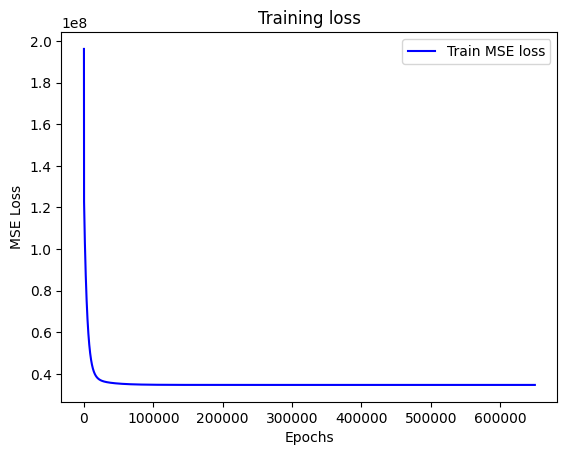

In [24]:
linear_reg.plot_curve()

Train your own model and predict for testing data.

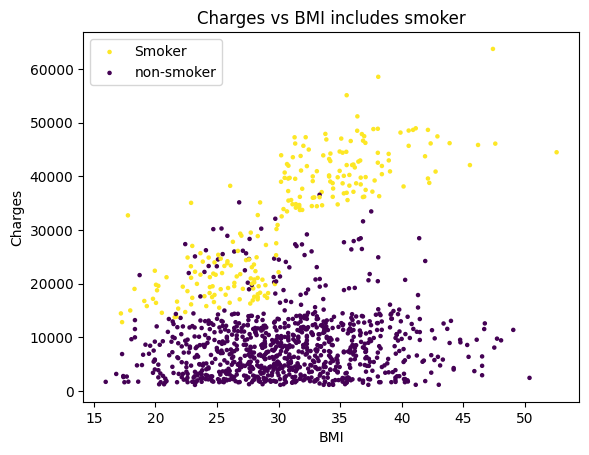

In [25]:
train_bmi = df_train[['bmi']]
train_smoker = df_train[['smoker']]
train_smoker=train_smoker.to_numpy()
y_train = df_train['charges']
val_bmi = df_val[['bmi']]
val_smoker = df_val[['smoker']]
val_smoker=val_smoker.to_numpy()
y_val = df_val['charges']
plt.title('Charges vs BMI includes smoker')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.scatter(train_bmi,y_train,s=5,c=train_smoker)
plt.scatter(val_bmi,y_val,s=5,c=val_smoker)
plt.legend(['Smoker','non-smoker'],loc='upper left')
plt.show()

In [26]:
def combine_feature(s,b):
    result=np.zeros((s.shape[0],1))
    for i in range(s.shape[0]):
        if s[i]==0:
            result[i]=0
        elif b[i]<30:
            result[i]=1
        else:
            result[i]=2
    return result 

In [27]:
#training
train_smoker = df_train[['smoker']]
train_smoker=train_smoker.to_numpy()
train_bmi = df_train[['bmi']]
train_bmi=train_bmi.to_numpy()

x_train = df_train.drop(['charges','smoker','bmi'], axis=1)
x_train['smoker+bmi']=combine_feature(train_smoker,train_bmi)
y_train = df_train['charges']
#validing
val_smoker = df_val[['smoker']]
val_smoker=val_smoker.to_numpy()
val_bmi = df_val[['bmi']]
val_bmi=val_bmi.to_numpy()

x_val = df_val.drop(['charges','smoker','bmi'], axis=1)
x_val['smoker+bmi']=combine_feature(val_smoker,val_bmi)
y_val = df_val['charges']
#testing
test_smoker = df_test[['smoker']]
test_smoker=test_smoker.to_numpy()
test_bmi = df_test[['bmi']]
test_bmi=test_bmi.to_numpy()

x_test = df_test.drop(['charges','smoker','bmi'], axis=1)
x_test['smoker+bmi']=combine_feature(test_smoker,test_bmi)

In [28]:
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_val=x_val.to_numpy()
y_val=y_val.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.reshape(y_train.shape[0],1)
y_val=y_val.reshape(y_val.shape[0],1)

In [29]:
batch_size = x_train.shape[0]
# TODO
lr = 0.0005
epochs = 50000
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [30]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [-2079.36564254]
Weights:  [[  270.04940676]
 [ -713.77818215]
 [  467.80900896]
 [ -344.16230369]
 [16182.15971661]]


In [31]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  19953093.709347773


In [32]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  25998379.416761093


In [33]:
test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


Output the csv file

In [34]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("311553046_prediction.csv")